In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
import seaborn as sns
from scipy import stats
import patsy
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import re

/var/folders/tb/nqt4pmyx2wbcgyhc4cbl0n1m0000gn/T/ipykernel_99050/1871387411.py:4: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


In [ ]:
import os
print(os.getcwd())
major= pd.read_csv("/Users/priyam/Downloads/degrees-that-pay-back.csv")
college_type = pd.read_csv('/Users/priyam/Downloads/salaries-by-college-type.csv')
college_rank = pd.read_csv('/Users/priyam/Downloads/timesData.csv')
gender = pd.read_csv('/Users/priyam/Downloads/Placement_Data_Full_Class.csv')


In [ ]:
print(os.getcwd())
major= pd.read_csv("/Users/priyam/Downloads/degrees-that-pay-back.csv")
college_type = pd.read_csv('/Users/priyam/Downloads/salaries-by-college-type.csv')
college_rank = pd.read_csv('/Users/priyam/Downloads/timesData.csv')
gender = pd.read_csv('/Users/priyam/Downloads/Placement_Data_Full_Class.csv')


In [5]:
major.head()

,Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [6]:
college_type.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [7]:
college_rank.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [8]:

gender.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [9]:
#keep only the necessary columns in major
major = major[['Major','Starting Median Salary']]


In [10]:
#check for NaN
major['Starting Median Salary'].hasnans



False

In [11]:
#check the type
major.dtypes

Major                     object
Starting Median Salary    object
dtype: object

In [12]:
#change salary to int 
def int_salary(salary):
  return int(salary.strip("$").split('.')[0].replace(',',''))


In [13]:
#Change salary to int in major 
major = major.set_axis(['major','salary'], axis = 'columns')
major.salary = major.salary.apply(int_salary)


In [14]:
#sort values of salary
major = major.sort_values(by=['salary'],ascending=False).reset_index(drop=True)
major.head()


,major,salary
0,Physician Assistant,74300
1,Chemical Engineering,63200
2,Computer Engineering,61400
3,Electrical Engineering,60900
4,Mechanical Engineering,57900


In [15]:
#categorize the type of the majors
engr_tech= ['Chemical Engineering','Computer Engineering', 'Electrical Engineering',
       'Mechanical Engineering', 'Aerospace Engineering',
       'Industrial Engineering', 'Computer Science','Civil Engineering',
      'Management Information Systems (MIS)', 'Information Technology (IT)']

math_sci = ['Physician Assistant','Nursing','Construction', 'Physics',
            'Math','Geology', 'Agriculture', 'Chemistry',
            'Nutrition','Forestry','Biology']

bus= ['Finance', 'Accounting','Business Management','Marketing']

lang_SocSci= ['Criminal Justice', 'Education', 'Religion', 'Spanish',
          'Anthropology', 'Sociology','Psychology', 'Communications', 'English',
          'Hospitality & Tourism', 'Journalism', 'Health Care Administration',
          'History','Political Science','Philosophy', 'International Relations','Geography','Economics']

art =  ['Music', 'Drama', 'Art History', 'Graphic Design',
        'Interior Design','Film','Architecture']


In [38]:
#function to categorize major 
def standardize_major(string):   
   
    if string in math_sci:
        output = 'Science'
    elif string in engr_tech:
        output = 'Engineering'
    elif string in bus:
        output = 'Business'
    elif string in lang_SocSci:
        output = 'SocialScience'  
    elif string in art:
        output = 'Arts'
    else:
        output = string
    
    return output



In [39]:
#apply the function into a new column
major['type'] = major['major'].apply(standardize_major)



In [40]:
#re-order the columns
major = major[['major','type', 'salary']]
major.head()



,major,type,salary
0,Physician Assistant,Science,74300
1,Chemical Engineering,Engineering,63200
2,Computer Engineering,Engineering,61400
3,Electrical Engineering,Engineering,60900
4,Mechanical Engineering,Engineering,57900


In [41]:
# keep only the necessary columns in college_type
college_df = college_type[['School Name', 'Starting Median Salary']]

# rename columns
college_df = college_df.rename(columns = {'School Name': 'name', 'Starting Median Salary': 'salary'})

# keep only the necessary columns in college_rank
rank_df = college_rank[['world_rank', 'university_name']]

# only include the most comprehensive ranking (only run this cell once)
comprehensive_rank_df = rank_df.iloc[1803 : -1, : ]
comprehensive_rank_df.head()

# rename columns
comprehensive_rank_df = comprehensive_rank_df.rename(columns = {'university_name': 'name', 'world_rank': 'rank'})

# making the ranks more exact
comprehensive_rank_df = comprehensive_rank_df.reset_index(drop=True)
comprehensive_rank_df['index1'] = comprehensive_rank_df.index
comprehensive_rank_df = comprehensive_rank_df.assign(exact_rank = comprehensive_rank_df['index1'] + 1)
exact_rank_df = comprehensive_rank_df[['name', 'exact_rank']]
exact_rank_df = exact_rank_df.rename(columns = {'name': 'name', 'exact_rank': 'rank'})



In [42]:
# check for nans
print(college_df['name'].hasnans,
      college_df['salary'].hasnans,
      exact_rank_df['name'].hasnans,
      exact_rank_df['rank'].hasnans)

False False False False


In [43]:
# standardize college names
def standardize_name(string):
    
    # remove things in parentheses
    string = re.sub(r"\([^()]*\)", "", string)
    
    #all lowercase 
    string = string.lower()
    string = string.strip()
    
    #remove punctuation marks and 
    string = string.replace(",", "")
    string = string.replace("at", "")
    
    output = string.strip()
    
    return output



In [44]:
# apply function to college_df
pd.options.mode.chained_assignment = None
college_df['name'] = college_df['name'].apply(standardize_name)

# apply function to exact_rank_df
pd.options.mode.chained_assignment = None
exact_rank_df['name'] = exact_rank_df['name'].apply(standardize_name)



In [45]:
# merge college_df and comprehensive_rank_df
quality = pd.merge(college_df, exact_rank_df, on='name')



In [46]:
#change salary in quality to integer 
quality.salary = quality.salary.apply(int_salary)



In [47]:

# sort by values in salary and reset the index
quality = quality.sort_values(by = ['salary'], ascending = False).reset_index(drop=True)
quality

,name,salary,rank
0,california institute of technology,75500,1
1,massachusetts institute of technology,72200,5
2,princeton university,66500,7
3,harvard university,63400,6
4,carnegie mellon university,61800,22
...,...,...,...
85,university of new mexico,41600,375
86,university of south florida,41100,238
87,university of south carolina,40000,384
88,kent ste university,38700,540


In [48]:
#Gender & Internship Experience

# drop NaN
gender = gender.dropna()
# only take useful columns
gender_sub = gender[['gender','salary', 'workex', 'degree_t']]


In [49]:
# replace Yes with 1, No with 0 in the column 'workex'
def binarize_column(str_in):
    str_in = str_in.lower()
    if 'no' in str_in:
        output = 0
    elif 'yes' in str_in:
        output = 1
        
    return output



In [50]:
def standardize_gender(str_in):
    str_in = str_in.lower()
    if 'm' in str_in:
        output = 'male'
    elif 'f' in str_in:
        output = 'female'
        
    return output


In [51]:
#standardize the gender
gender_sub['workex'] = gender_sub['workex'].apply(binarize_column)
gender_sub['gender'] = gender_sub['gender'].apply(standardize_gender)
gender_sub = gender_sub.rename(columns = {'degree_t': 'major'})
gender_df = gender_sub.sort_values(by = ['salary'], ascending = False)
gender_df = gender_df.reset_index(drop=True)
gender_df


,gender,salary,workex,major
0,male,940000.0,1,Comm&Mgmt
1,male,690000.0,1,Sci&Tech
2,female,650000.0,1,Comm&Mgmt
3,male,500000.0,0,Sci&Tech
4,male,500000.0,1,Sci&Tech
...,...,...,...,...
143,male,200000.0,1,Sci&Tech
144,female,200000.0,1,Comm&Mgmt
145,female,200000.0,1,Comm&Mgmt
146,female,200000.0,0,Comm&Mgmt


In [52]:
#display the data table
major.head()

#check the shape
major.shape


(50, 3)

In [53]:
#display the type of the variables 
major.dtypes


major     object
type      object
salary     int64
dtype: object

In [54]:
#display those majors
major['major'].unique()


array(['Physician Assistant', 'Chemical Engineering',
       'Computer Engineering', 'Electrical Engineering',
       'Mechanical Engineering', 'Aerospace Engineering',
       'Industrial Engineering', 'Computer Science', 'Nursing',
       'Civil Engineering', 'Construction', 'Physics', 'Economics',
       'Management Information Systems (MIS)',
       'Information Technology (IT)', 'Finance', 'Accounting', 'Math',
       'Geology', 'Business Management', 'Agriculture', 'Chemistry',
       'Architecture', 'Geography', 'International Relations',
       'Political Science', 'Marketing', 'Philosophy', 'Nutrition',
       'History', 'Forestry', 'Health Care Administration', 'Biology',
       'Communications', 'English', 'Film', 'Hospitality & Tourism',
       'Anthropology', 'Sociology', 'Interior Design', 'Psychology',
       'Music', 'Drama', 'Art History', 'Graphic Design', 'Journalism',
       'Criminal Justice', 'Education', 'Religion', 'Spanish'],
      dtype=object)

In [55]:
#check the number of each type of major 
major['type'].value_counts()


SocialScience    18
Science          11
Engineering      10
Arts              7
Business          4
Name: type, dtype: int64

In [56]:
#check for NaN values 
major['major'].hasnans



False

In [57]:
# look at stats of the major dataset
major.describe(include='all')

,major,type,salary
count,50,50,50.000000
unique,50,5,NaN
top,Physician Assistant,SocialScience,NaN
freq,1,18,NaN
mean,NaN,NaN,44310.000000
std,NaN,NaN,9360.866217
min,NaN,NaN,34000.000000
25%,NaN,NaN,37050.000000
50%,NaN,NaN,40850.000000
75%,NaN,NaN,49875.000000


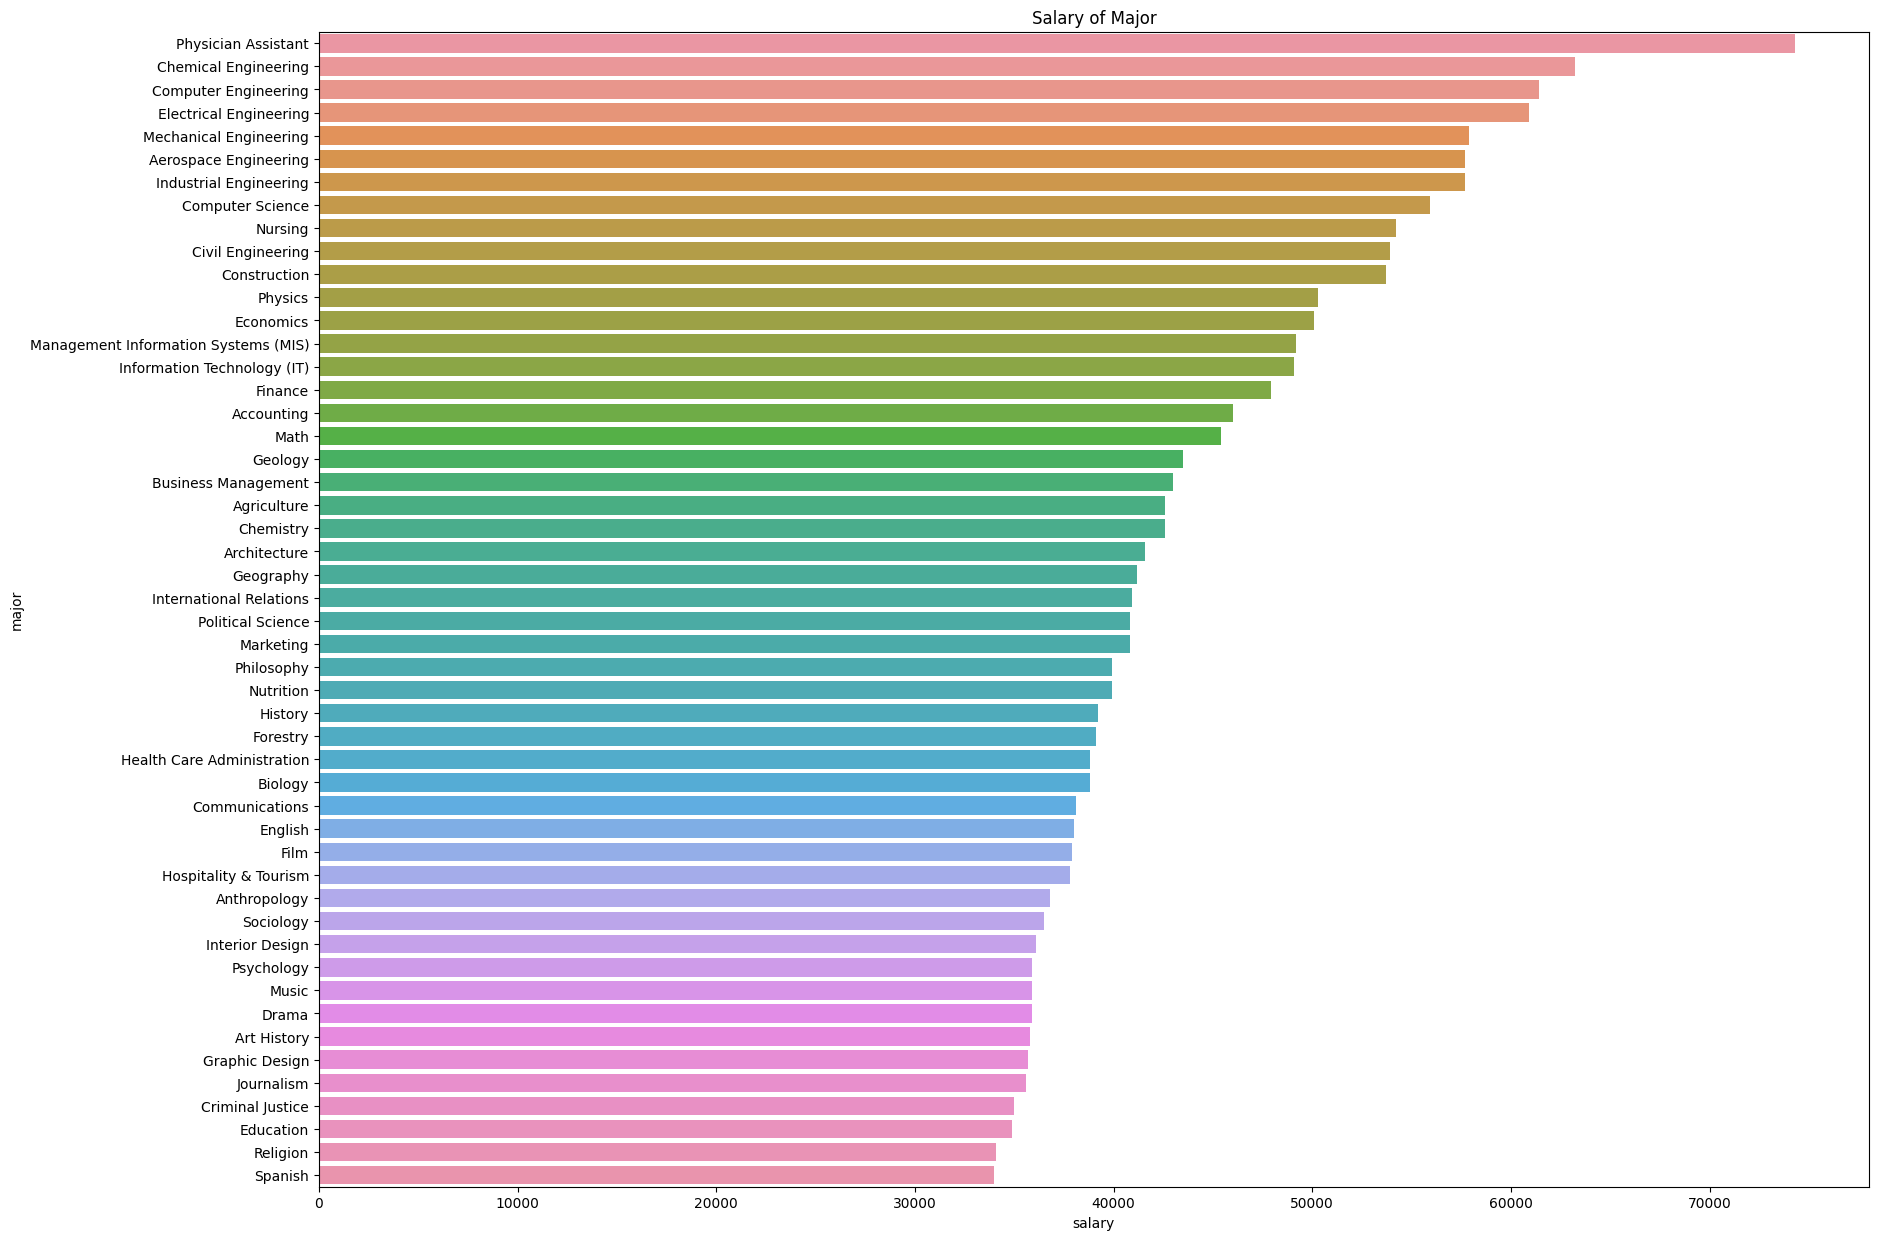

In [64]:
#display the Salary of Major barplot 
plt.figure(figsize=(20, 15))
major_salary = sns.barplot(x='salary', y='major', data=major);
major_salary.set_title('Salary of Major');



[Text(0.5, 0, 'Major Type'), Text(0, 0.5, 'Salary')]

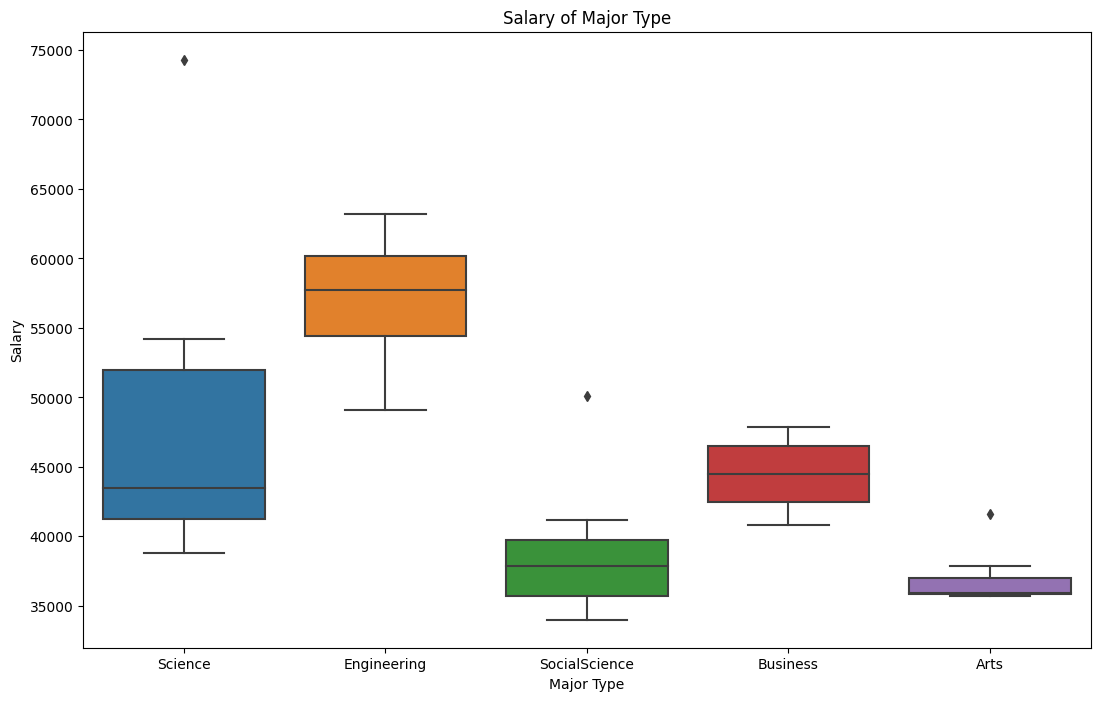

In [78]:
#display boxplot of salary of major type 
plt.figure(figsize=(13, 8))
major_type = sns.boxplot(x='type', y='salary', data=major)
major_type.set_title('Salary of Major Type');
major_type.set(xlabel='Major Type', ylabel='Salary')


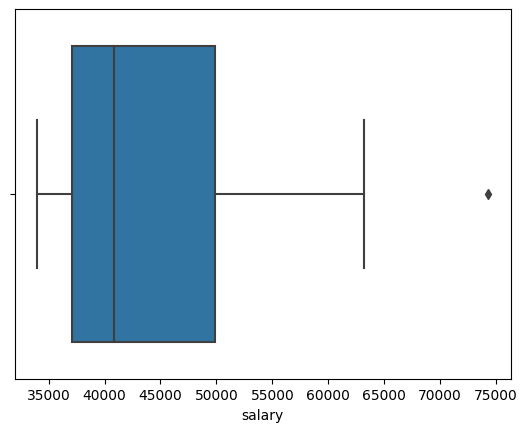

In [79]:
#approximately locate the outliers using boxplot
sns.boxplot(x='salary', data=major);


In [80]:
#apply quantiles method  
lower= major['salary'].quantile(0.01)
upper = major['salary'].quantile(0.99)
upper,lower


(68860.99999999997, 34049.0)

In [81]:
#filter the outlier 
major_wo_outlier = major[(major['salary'] >= lower)&(major['salary'] <= upper)]


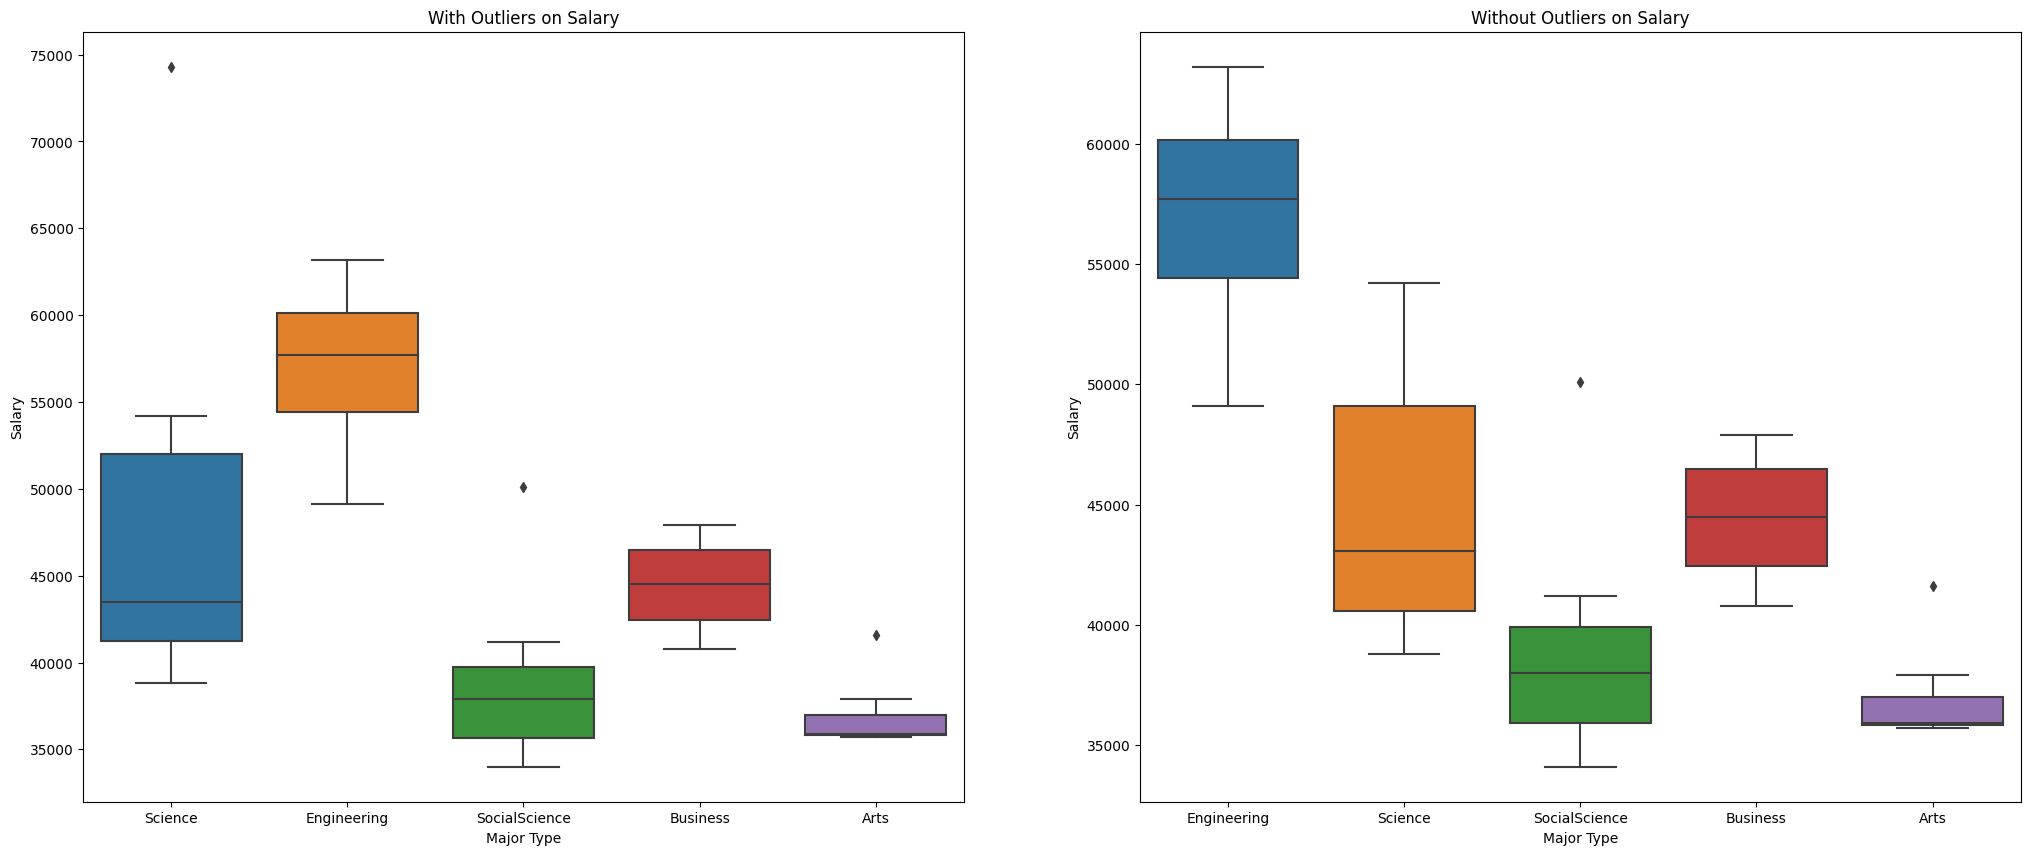

In [82]:
#compare two boxplots based on the outliers
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(25,10))

sns.boxplot(ax=ax1, data=major, x='type', y='salary')
ax1.set_title('With Outliers on Salary')
ax1.set(xlabel='Major Type', ylabel='Salary')

sns.boxplot(ax=ax2, data=major_wo_outlier, x='type', y='salary')
ax2.set_title('Without Outliers on Salary')
ax2.set(xlabel='Major Type', ylabel='Salary');


[Text(0.5, 0, 'Major Type'), Text(0, 0.5, 'Salary')]

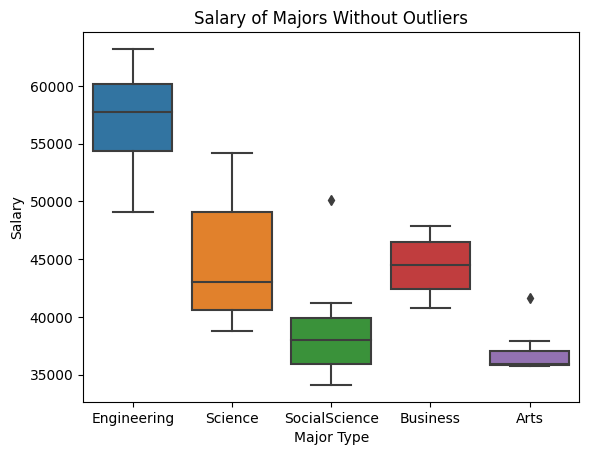

In [86]:

major_salary_wo=sns.boxplot(data=major_wo_outlier, x='type', y='salary')
major_salary_wo.set_title('Salary of Majors Without Outliers')
major_salary_wo.set(xlabel='Major Type', ylabel='Salary')

In [87]:
#College Quality
#(1) Structur
# check for the shape of the dataset
quality.head()

,name,salary,rank
0,california institute of technology,75500,1
1,massachusetts institute of technology,72200,5
2,princeton university,66500,7
3,harvard university,63400,6
4,carnegie mellon university,61800,22


In [88]:
# check for missing values in the quality dataset
print(quality['name'].hasnans, quality['salary'].hasnans, quality['rank'].hasnans)


False False False


In [89]:
print(len(college_df), len(exact_rank_df), len(quality))


269 799 90


In [90]:
# look at stats of the quality dataset
quality.describe()


,salary,rank
count,90.000000,90.000000
mean,48823.333333,259.266667
std,7127.980157,208.165762
min,37300.000000,1.000000
25%,44150.000000,75.000000
50%,46950.000000,221.000000
75%,51850.000000,398.250000
max,75500.000000,772.000000


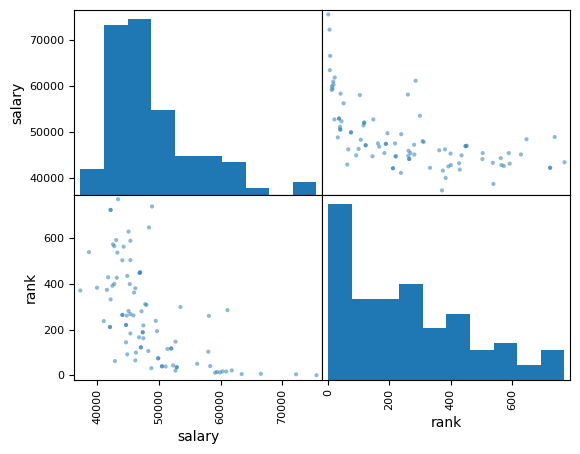

In [91]:
# visualize the scatterplot of rank and salary
pd.plotting.scatter_matrix(quality);

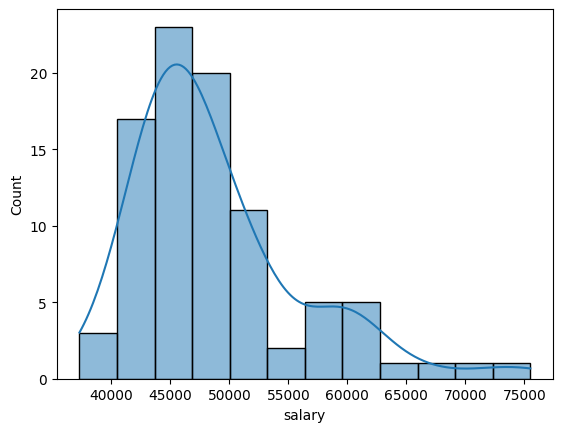

In [92]:
# plot a histogram of salary
sns.histplot(quality['salary'], kde=True);


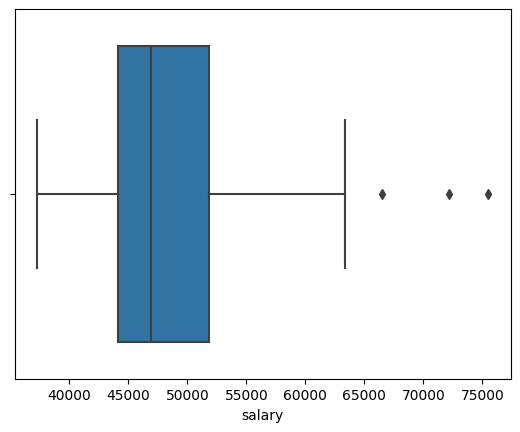

In [93]:
# plot a box plot to locate potential outliers
sns.boxplot(x='salary', data=quality);

In [94]:
# calculate the quantiles and IQR of salary
Q1 = quality['salary'].quantile(0.25)
Q3 = quality['salary'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

44150.0 51850.0 7700.0


In [95]:
# calculate boundaries for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(lower, upper)


32600.0 63400.0


In [96]:
# try to locate any lower ourliers
quality_lower_outliers = quality[quality['salary'] < lower]
quality_lower_outliers

,name,salary,rank


In [97]:
# try to locate any upper ourliers
quality_upper_outliers = quality[quality['salary'] > upper]
quality_upper_outliers

,name,salary,rank
0,california institute of technology,75500,1
1,massachusetts institute of technology,72200,5
2,princeton university,66500,7


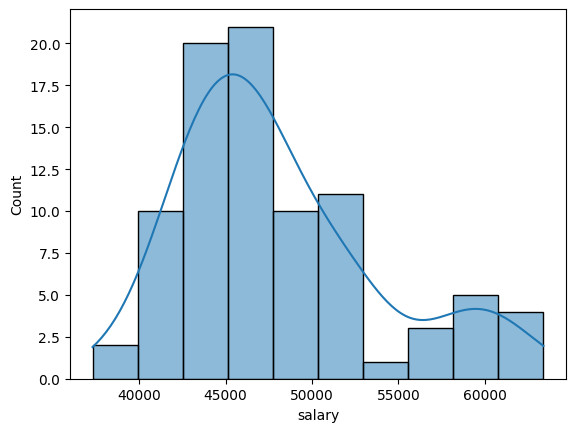

In [98]:
# exclude the outliers and check out the distribution again
no_outlier_quality = quality[quality['salary'] <= upper]
sns.histplot(no_outlier_quality['salary'], kde=True, bins=10);

In [144]:
#dataframe showing the results of the histogram
bimodal_df = pd.cut(no_outlier_quality['salary'], bins = 10).value_counts(sort=False)
bimodal_df

(37273.9, 39910.0]     2
(39910.0, 42520.0]    10
(42520.0, 45130.0]    20
(45130.0, 47740.0]    21
(47740.0, 50350.0]    10
(50350.0, 52960.0]    11
(52960.0, 55570.0]     1
(55570.0, 58180.0]     3
(58180.0, 60790.0]     5
(60790.0, 63400.0]     4
Name: salary, dtype: int64

In [145]:
#splitting quality into two dataframes based on the results above
lower_sal_df = no_outlier_quality[no_outlier_quality['salary'] <= 52960.0]
upper_sal_df = no_outlier_quality[no_outlier_quality['salary'] > 52960.0]

In [146]:
lower_sal_df.head()

,name,salary,rank
16,university of illinois urbana-champaign,52900,36
17,university of illinois urbana-champaign,52900,36
18,university of virginia,52700,148
19,university of michigan,52700,21
20,university of california davis,52300,44


In [147]:
upper_sal_df.head()

,name,salary,rank
3,harvard university,63400,6
4,carnegie mellon university,61800,22
5,rensselaer polytechnic institute,61100,286
6,university of pennsylvania,60900,17
7,cornell university,60300,18


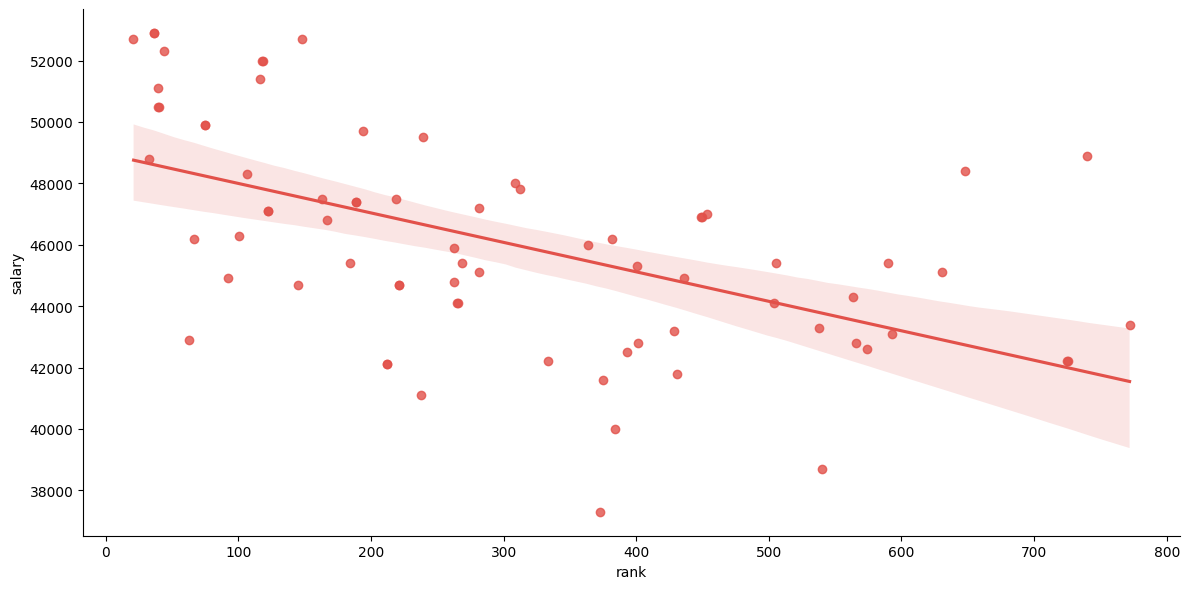

In [152]:
#We will first try to find a relationship between rank and salary for the two separate dataframes.

# plot scatterplot of smaller mode between rank and salary
sns.lmplot(x='rank', y='salary', 
           data=lower_sal_df, fit_reg=True, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

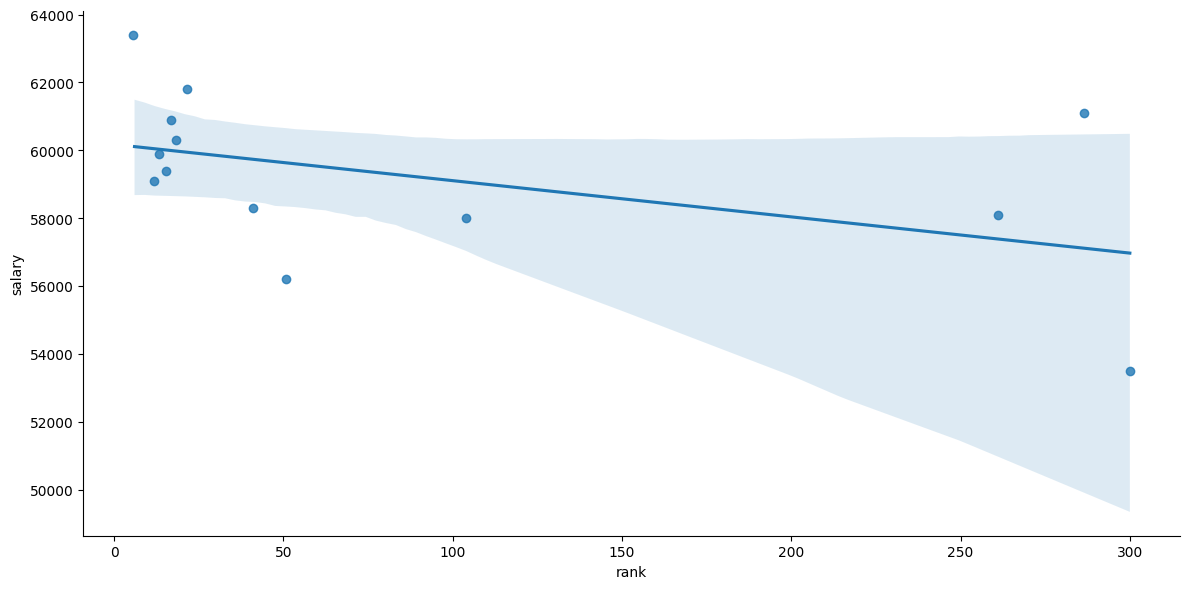

In [104]:
# plot scatterplot of bigger mode between rank and salary
sns.lmplot(x='rank', y='salary', 
           data=upper_sal_df, fit_reg=True, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

In [105]:
#From the two plots above, we see that the dataframe where the first mode occurs shows a somewhat negative correlation between rank and salary, and the datapoints are scattered across the graph. On the other hand, for the dataframe with the higher salaries, most of the ranks are somewhere below 50, with only a few greater than 50. A relationship is not quite evident in this case. Therefore, despite the salary showing a bimodel distribution, we will not be separating the dataset into two for our modeling.


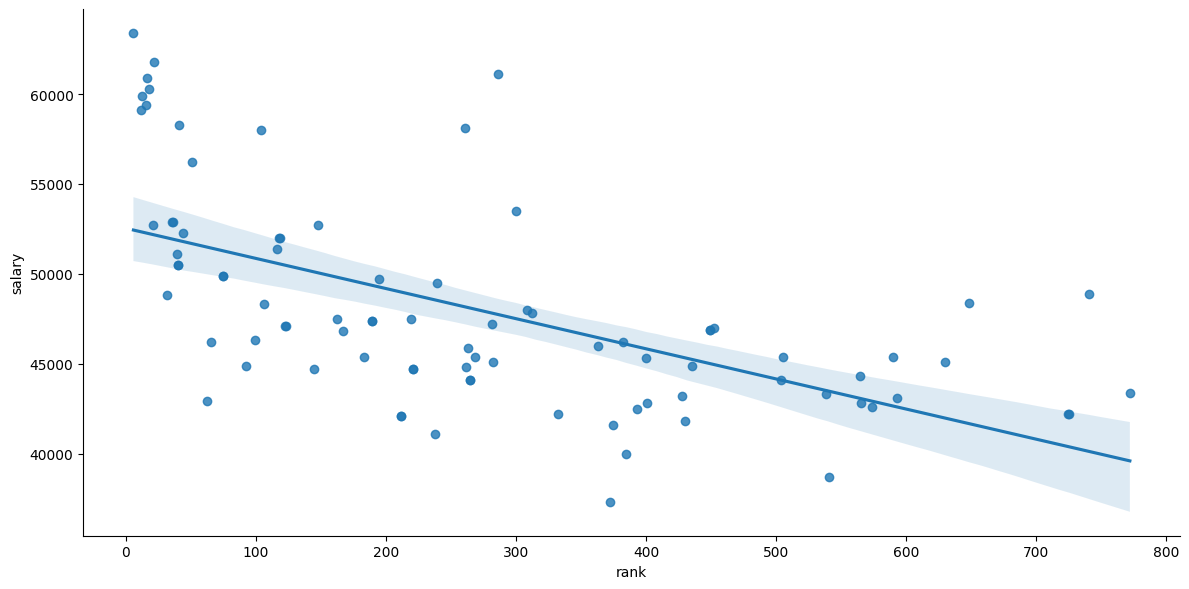

In [106]:
# plot scatterplot between rank and salary
sns.lmplot(x='rank', y='salary', 
           data=no_outlier_quality, fit_reg=True, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

In [107]:
#Using the entire salary distribution, the scatter plot above shows a potential negative correlation between rank and salary. As the university quality becomes lower, the starting median salary also decreases.

In [108]:
# look at the amount of each gender
gender_df['gender'].value_counts()

male      100
female     48
Name: gender, dtype: int64

In [109]:
# look at stats of the female 
gender_df[gender_df['gender']=='female'].salary.describe()

count        48.000000
mean     267291.666667
std       75948.178955
min      200000.000000
25%      219500.000000
50%      250000.000000
75%      300000.000000
max      650000.000000
Name: salary, dtype: float64

In [110]:
gender_df[gender_df['gender']=='male'].salary.describe()

count       100.000000
mean     298910.000000
std       99514.792058
min      200000.000000
25%      250000.000000
50%      270000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

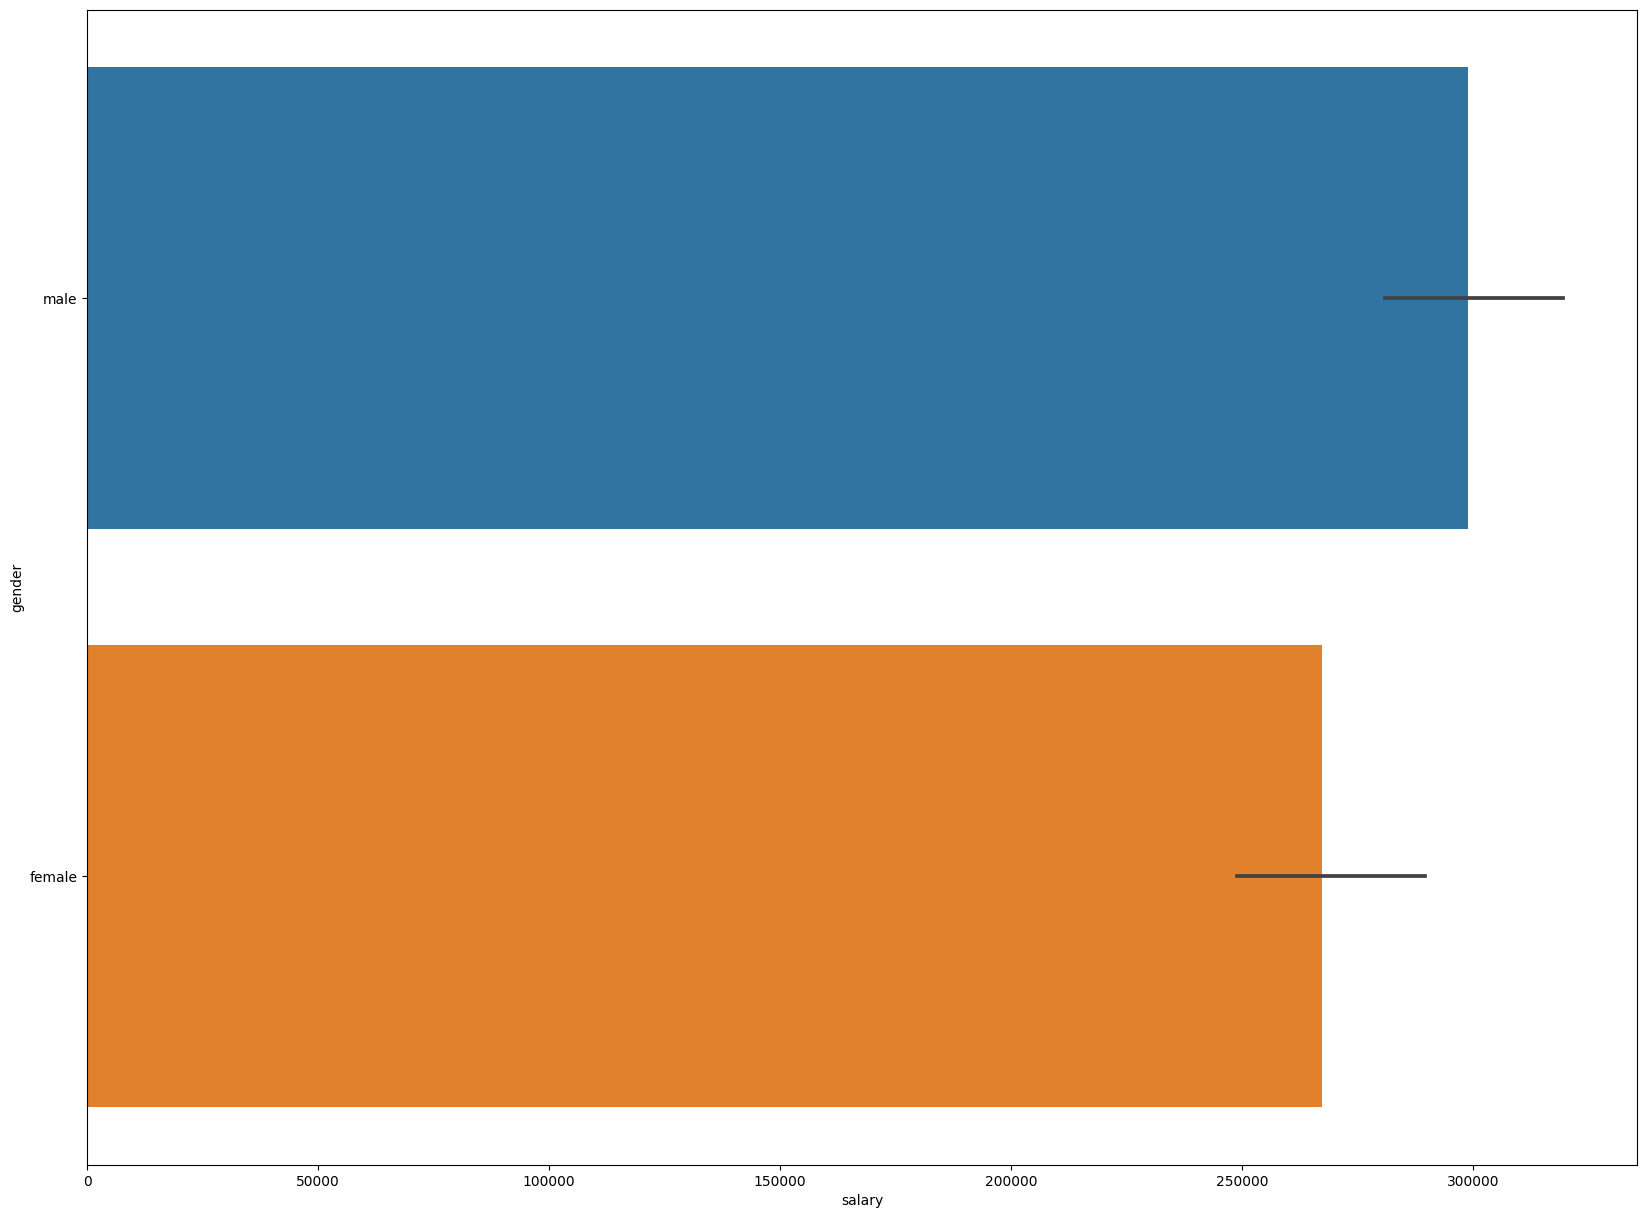

In [111]:
#barplot for the dataset
plt.figure(figsize=(20,15))
sns.barplot(x="salary", y="gender", data=gender_df);


Text(0, 0.5, 'Salary')

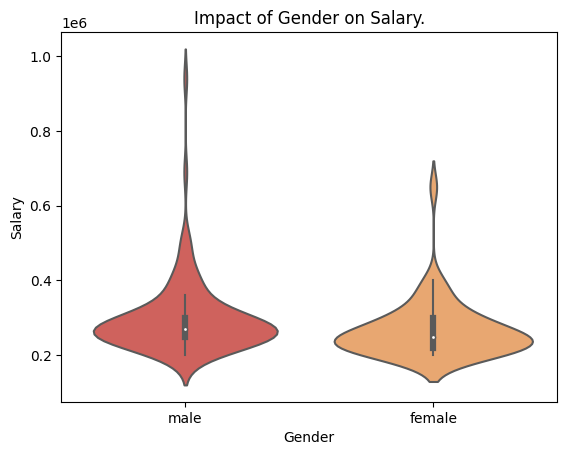

In [161]:
ax=sns.violinplot(x="gender", y="salary", data=gender_df)
ax.set_title('Impact of Gender on Salary.')
ax.set_xlabel('Gender')
ax.set_ylabel('Salary')

<AxesSubplot: xlabel='salary', ylabel='Count'>

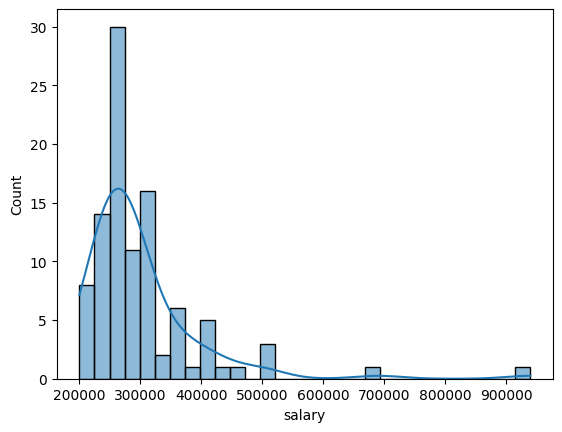

In [114]:
# take a look at the distribution of male's salary
sns.histplot(data=gender_df[gender_df['gender']=='male'], x="salary", kde=True, bins=30)

<AxesSubplot: xlabel='gender', ylabel='salary'>

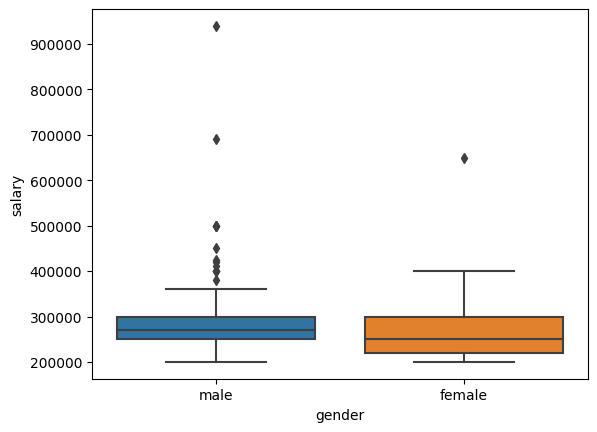

In [115]:
# use boxplot
sns.boxplot(x='gender', y='salary', data=gender_df)

In [116]:
# try to filter out the outliers for each gender
f_lower= gender_df[gender_df['gender']=='female'].salary.quantile(0.01)
f_upper = gender_df[gender_df['gender']=='female'].salary.quantile(0.99)
f_upper, f_lower

(532500.0000000002, 200000.0)

In [117]:
m_lower= gender_df[gender_df['gender']=='male'].salary.quantile(0.01)
m_upper = gender_df[gender_df['gender']=='male'].salary.quantile(0.99)
m_upper, m_lower

(692500.0000000013, 200000.0)

In [118]:
gender_wo_out = gender_df

gender_wo_out = gender_wo_out.drop(gender_wo_out[(gender_wo_out['gender']=='female')&(gender_wo_out['salary']<=f_lower)].index)
gender_wo_out = gender_wo_out.drop(gender_wo_out[(gender_wo_out['gender']=='female')&(gender_wo_out['salary']>=f_upper)].index)

gender_wo_out = gender_wo_out.drop(gender_wo_out[(gender_wo_out['gender']=='male')&(gender_wo_out['salary']<=m_lower)].index)
gender_wo_out = gender_wo_out.drop(gender_wo_out[(gender_wo_out['gender']=='male')&(gender_wo_out['salary']>=m_upper)].index)
gender_wo_out

,gender,salary,workex,major
1,male,690000.0,1,Sci&Tech
3,male,500000.0,0,Sci&Tech
4,male,500000.0,1,Sci&Tech
5,male,500000.0,1,Sci&Tech
6,male,450000.0,0,Sci&Tech
...,...,...,...,...
137,female,210000.0,1,Comm&Mgmt
138,female,210000.0,1,Sci&Tech
139,female,210000.0,0,Comm&Mgmt
140,female,204000.0,0,Comm&Mgmt


<AxesSubplot: xlabel='salary', ylabel='Count'>

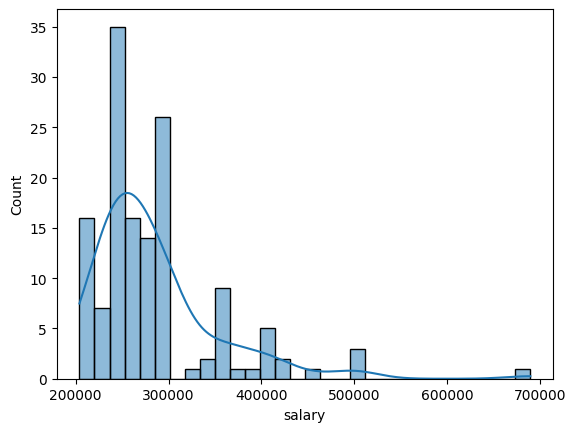

In [119]:
#plot again to see the distribution of whole dataset
sns.histplot(data=gender_wo_out, x="salary", kde=True, bins=30)

In [120]:
# It seems like we still need to filter the dataset. And maybe it is better to filter base on gender but it may cause more bias so at this point we consider whether other factors may affect.

#However, will other factors affect the salary? Now, take a look at the effect of work experiences.

In [121]:
# take a look at the description of inexperienced person's salary
gender_wo_out[gender_wo_out['workex']==0].salary.describe()

count        81.000000
mean     280395.061728
std       60898.825730
min      204000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      500000.000000
Name: salary, dtype: float64

In [122]:
# take a look at the description of experienced person's salary
gender_wo_out[gender_wo_out['workex']==1].salary.describe()

count        59.000000
mean     291847.457627
std       80851.249870
min      204000.000000
25%      250000.000000
50%      270000.000000
75%      300000.000000
max      690000.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Experienced person')

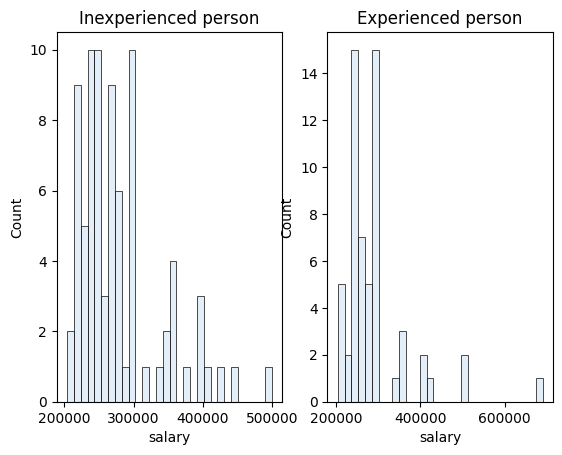

In [225]:
# take a look at the distribution of two groups
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.set_palette("Blues")
sns.histplot(data=gender_wo_out[gender_wo_out['workex']==0], x="salary", ax=ax1, kde=False, bins=30)
ax1.set_title('Inexperienced person')
sns.histplot(data=gender_wo_out[gender_wo_out['workex']==1], x="salary", ax=ax2, kde=False, bins=30)
ax2.set_title('Experienced person')

<AxesSubplot: xlabel='workex', ylabel='salary'>

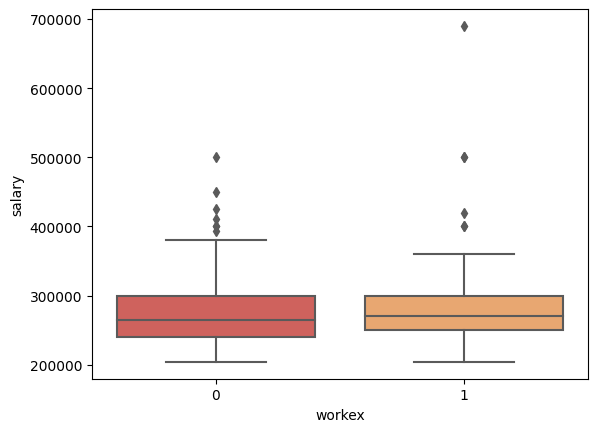

In [124]:
# use boxplot
sns.boxplot(x='workex', y='salary', data=gender_wo_out)

In [125]:
gender_wo_out['major'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

<AxesSubplot: xlabel='major', ylabel='salary'>

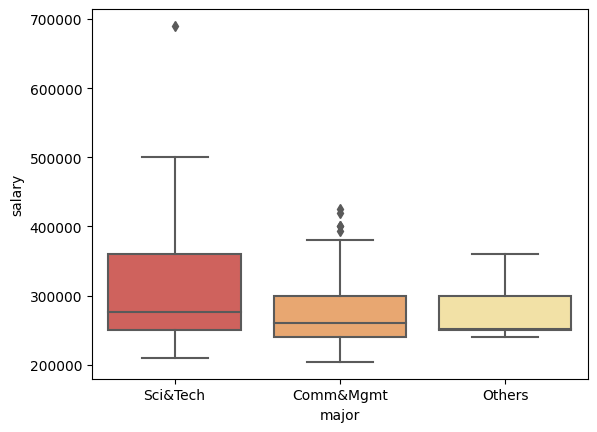

In [126]:
sns.boxplot(x='major', y='salary', data=gender_wo_out)

<AxesSubplot: xlabel='major', ylabel='salary'>

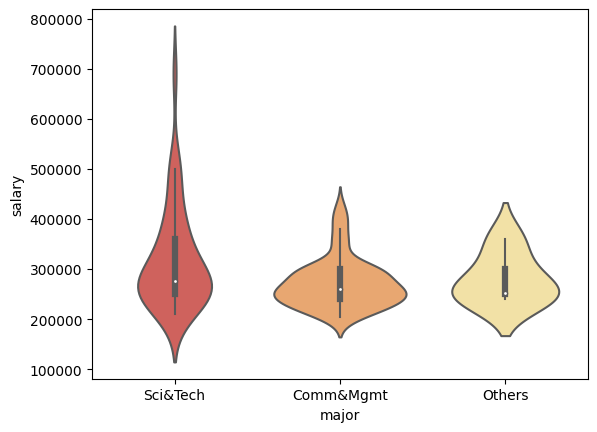

In [127]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#import seaborn as sns
#df = sns.load_dataset('gender_wo_out')
#x='major', y='salary', data=gender_wo_out
# plot
sns.violinplot(x='major', y='salary', data=gender_wo_out)

In [128]:
#We find that both gender and internship experience may exert an influence the starting salary.



In [129]:
#Major
#For our regression analysis, we decide to utilize the dataset that includes the outliers on salary instead of the one that does not, since we believe that each of the variables are significant, especially when each major is unique in the dataset which might negatively affect our final result if we remove one of them.

#We first transfer the categorical variables into dummy variables from the cleaned major dataset and create a new dataframe "major dummy":



In [130]:
#transfer the categorical variables in to dummies
major_dummy= pd.get_dummies(major['type'])
#join two dataframes
major_dummy= pd.concat([major,major_dummy],axis=1)
#drop the repeated columns 
major_dummy.drop(['type'], axis =1,inplace=True)
major_dummy.head()

,major,salary,Arts,Business,Engineering,Science,SocialScience
0,Physician Assistant,74300,0,0,0,1,0
1,Chemical Engineering,63200,0,0,1,0,0
2,Computer Engineering,61400,0,0,1,0,0
3,Electrical Engineering,60900,0,0,1,0,0
4,Mechanical Engineering,57900,0,0,1,0,0


In [131]:
#we use the OLS model below to display the regression results:

In [132]:
X = major_dummy.drop(['major','salary'],axis=1)
Y = major_dummy['salary']

In [133]:
major_model = sm.OLS(Y, X)
major_res= major_model.fit()
print(major_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     19.15
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.94e-09
Time:                        16:48:22   Log-Likelihood:                -502.81
No. Observations:                  50   AIC:                             1016.
Df Residuals:                      45   BIC:                             1025.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Arts           3.699e+04   2246.045     16.467

In [134]:
#The above regression model shows that the R-squared value is 0.63 which means the percentage of the data
#to fit the regression line is 63%.



In [140]:
#check the corr between the variables 
major_dummy.corr()

,salary,Arts,Business,Engineering,Science,SocialScience
salary,1.000000,-0.318897,0.003659,0.667977,0.192720,-0.494508
Arts,-0.318897,1.000000,-0.118978,-0.201737,-0.214279,-0.302605
Business,0.003659,-0.118978,1.000000,-0.147442,-0.156608,-0.221163
Engineering,0.667977,-0.201737,-0.147442,1.000000,-0.265543,-0.375000
Science,0.192720,-0.214279,-0.156608,-0.265543,1.000000,-0.398314
SocialScience,-0.494508,-0.302605,-0.221163,-0.375000,-0.398314,1.000000


In [128]:
#Based on the correlation table above, Engineering & Tech major 
#has the strongest positive relationship with salary than other major types with the value of ~0.668.

In [129]:
# linear regression model for college quality and salary

quality_outcome, quality_predictors = patsy.dmatrices('salary ~ rank', no_outlier_quality)
quality_mod = sm.OLS(quality_outcome, quality_predictors)
quality_res = quality_mod.fit()
print(quality_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     46.64
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.20e-09
Time:                        14:19:32   Log-Likelihood:                -857.91
No. Observations:                  87   AIC:                             1720.
Df Residuals:                      85   BIC:                             1725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.254e+04    828.253     63.432      0.0

In [163]:
# The summary above indicates that the relationship between college quality and salary can be expressed by salary = 52540 - 16.7623 * rank. This indicates increased college quality, represented by a decrease in the numerical rank, 
#can lead to an increase in the median starting salary of college graduates. 35.4% of the variation in salary is explained by college rank/quality.

In [199]:
#The regression can be visualized in the following graph:

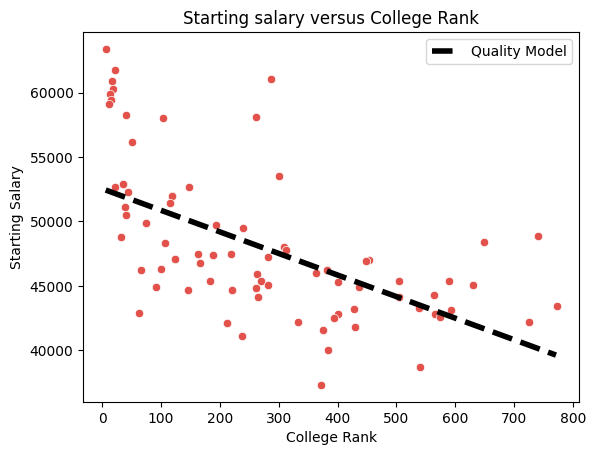

In [202]:
# Plot the orginal data on a scatter plot
sns.scatterplot(x='rank', y='salary', data=no_outlier_quality);

# Generate and plot the model fit line for quality
xs = np.arange(no_outlier_quality['rank'].min(), no_outlier_quality['rank'].max())
ys = -16.7623 * xs + 5.254e+04
plt.plot(xs, ys, '--k', linewidth=4, label='Quality Model')

# Rename the axis
plt.xlabel('College Rank')
plt.ylabel('Starting Salary')
plt.title('Starting salary versus College Rank')
plt.legend();

Text(0.5, 0.98, 'Impact of College Rank on Salary')

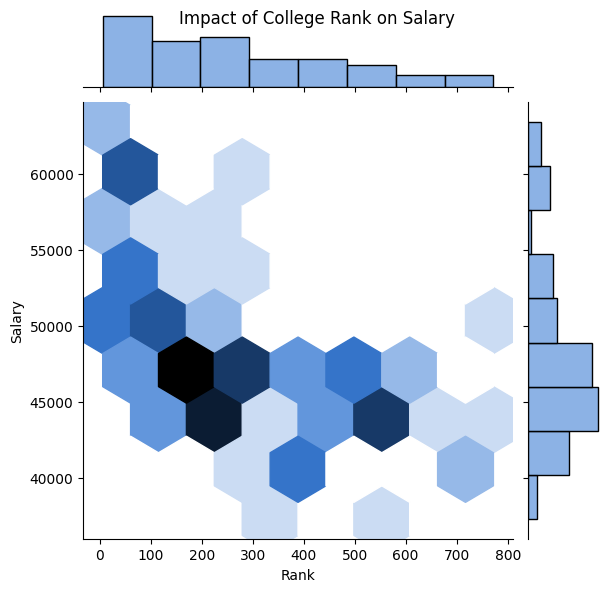

In [198]:
h= sns.jointplot(x='rank', y='salary', data=no_outlier_quality, kind='hex',color='#69d')
h.set_axis_labels('Rank', 'Salary')
h.fig.suptitle("Impact of College Rank on Salary")

In [183]:
#Gender & Internship Experience
# generate linear regression model. Gender is the predictor
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender', gender_wo_out)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     5.541
Date:                Thu, 15 Dec 2022   Prob (F-statistic):             0.0200
Time:                        18:25:41   Log-Likelihood:                -1757.2
No. Observations:                 140   AIC:                             3518.
Df Residuals:                     138   BIC:                             3524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.647e+05   1.05e+04     25.

In [134]:
# generate linear regression model. Work experience is the predictor 
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ workex', gender_wo_out)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9142
Date:                Thu, 15 Dec 2022   Prob (F-statistic):              0.341
Time:                        14:21:26   Log-Likelihood:                -1759.5
No. Observations:                 140   AIC:                             3523.
Df Residuals:                     138   BIC:                             3529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.804e+05   7775.678     36.061      0.0

In [135]:
#When we only consider gender or internship experience to predict salary, the R-squared is really small, which means that the model is not good enough.
#So we decide to add in other factors to run a multiple lienar regression to improve our model.

In [136]:
#hot encode major 
gender_wo_out['major'] = gender_wo_out.major.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
#generate regression model for gender, major, workex
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender + major + workex', gender_wo_out)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     5.220
Date:                Thu, 15 Dec 2022   Prob (F-statistic):            0.00193
Time:                        14:22:06   Log-Likelihood:                -1752.3
No. Observations:                 140   AIC:                             3513.
Df Residuals:                     136   BIC:                             3524.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.495e+05   1.17e+04     21.

In [137]:
#Since the R-square is only 0.103, which indicates that the model barely represent the relationship between outcome and 
#predictors, we decide to include some other columns from the original dataset. We will use exlusive method by checking 
#the p-value of each predictors or vairables in our regression model,
#trying to find the most significant factors that influence the salary within this dataset.

In [138]:
#check the shape of dataset
gender.shape

(148, 15)

In [139]:
#This time we consider the original dataset and drop some useless columns
gender_df2 = gender.drop(columns=['sl_no','status','ssc_b','hsc_b','hsc_s'])
gender_df2 = gender_df2.dropna()

In [140]:
#Doing data cleaning for the new dataset
gender_df2['workex'] = gender_df2['workex'].apply(binarize_column)
gender_df2['gender'] = gender_df2['gender'].apply(standardize_gender)
gender_df2 = gender_df2.rename(columns = {'degree_t': 'major'})

In [141]:
gender_df2.head()

,gender,ssc_p,hsc_p,degree_p,major,workex,etest_p,specialisation,mba_p,salary
0,male,67.00,91.00,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,270000.0
1,male,79.33,78.33,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,200000.0
2,male,65.00,68.00,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,250000.0
4,male,85.80,73.60,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,425000.0
7,male,82.00,64.00,66.00,Sci&Tech,1,67.0,Mkt&Fin,62.14,252000.0


In [142]:
# try to filter out the outliers
f_lower= gender_df2[gender_df2['gender']=='female'].salary.quantile(0.01)
f_upper = gender_df2[gender_df2['gender']=='female'].salary.quantile(0.99)

m_lower= gender_df2[gender_df2['gender']=='male'].salary.quantile(0.01)
m_upper = gender_df2[gender_df2['gender']=='male'].salary.quantile(0.99)

gender_wo_out2 = gender_df2

gender_wo_out2 = gender_wo_out2.drop(gender_wo_out2[(gender_wo_out2['gender']=='female')&(gender_wo_out2['salary']<=f_lower)].index)
gender_wo_out2 = gender_wo_out2.drop(gender_wo_out2[(gender_wo_out2['gender']=='female')&(gender_wo_out2['salary']>=f_upper)].index)

gender_wo_out2 = gender_wo_out2.drop(gender_wo_out2[(gender_wo_out2['gender']=='male')&(gender_wo_out2['salary']<=m_lower)].index)
gender_wo_out2 = gender_wo_out2.drop(gender_wo_out2[(gender_wo_out2['gender']=='male')&(gender_wo_out2['salary']>=m_upper)].index)

gender_wo_out2['major'] = gender_wo_out2.major.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})


In [143]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+ssc_p+hsc_p+degree_p+major+workex+etest_p+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     3.068
Date:                Thu, 15 Dec 2022   Prob (F-statistic):            0.00229
Time:                        14:24:43   Log-Likelihood:                -1746.5
No. Observations:                 140   AIC:                             3513.
Df Residuals:                     130   BIC:                             3542.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [144]:
#We can remove the least significant variable which has the highest p-value.

#So we remove workex.

In [145]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+ssc_p+hsc_p+degree_p+major+etest_p+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     3.441
Date:                Thu, 15 Dec 2022   Prob (F-statistic):            0.00125
Time:                        14:25:19   Log-Likelihood:                -1746.6
No. Observations:                 140   AIC:                             3511.
Df Residuals:                     131   BIC:                             3538.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [146]:
#Applying the same principle, we remove hsc_p.

In [147]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+ssc_p+degree_p+major+etest_p+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     3.914
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           0.000655
Time:                        14:25:46   Log-Likelihood:                -1746.7
No. Observations:                 140   AIC:                             3509.
Df Residuals:                     132   BIC:                             3533.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [148]:
#Applying the same principle,We remove etest_p.

In [149]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+ssc_p+degree_p+major+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.554
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           0.000311
Time:                        14:26:13   Log-Likelihood:                -1746.9
No. Observations:                 140   AIC:                             3508.
Df Residuals:                     133   BIC:                             3528.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [150]:
#Applying the same principle,We remove ssc_p.

In [151]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+degree_p+major+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     5.359
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           0.000159
Time:                        14:40:13   Log-Likelihood:                -1747.2
No. Observations:                 140   AIC:                             3506.
Df Residuals:                     134   BIC:                             3524.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [152]:
#Applying the same principle,we remove degree_p.



In [153]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+major+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     6.554
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           7.51e-05
Time:                        14:40:40   Log-Likelihood:                -1747.5
No. Observations:                 140   AIC:                             3505.
Df Residuals:                     135   BIC:                             3520.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [154]:
#Applying the same principle, we remove specialisation.

gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+major+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     8.474
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.35e-05
Time:                        14:40:58   Log-Likelihood:                -1747.9
No. Observations:                 140   AIC:                             3504.
Df Residuals:                     136   BIC:                             3516.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.629e+04   6.29e+04      1.

In [155]:
#After removing those least significant variables, gender, major, and mba_p are left. 
#The model has a low R-square value which indicates the predictors cannot precisely predict the outcome using this model.

#However, comparing to other variables, gender, major, and MBA percentage significantly affect the salary.This also calls back to the previous regression results, where the linear regression model for major has a higher R-squared value compared to those of the other three factors.

